<a href="https://colab.research.google.com/github/riinakik/digital-humanities-technologies/blob/main/assignment_01_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import requests
import matplotlib.pyplot as plt

url = "https://drive.google.com/uc?export=download&id=15cocRTr8kcybOfvRlDyNRoUNkubqslS1"
response = urllib.request.urlopen(url)
text = response.read().decode("utf-8")

mask_url = "https://drive.google.com/uc?export=download&id=1fjSZ0OLuRKQwcS8cVVKK8YkEQnHLSSdB"
urllib.request.urlretrieve(mask_url, "image.png")
mask = np.array(Image.open("image.png"))

mask2_url = "https://drive.google.com/uc?export=download&id=1o-3WVFtfeq15DAJn1ozrkr5bVG9q-oOm"
urllib.request.urlretrieve(mask2_url, "image1.png")
mask2 = np.array(Image.open("image1.png"))

print(text[:100])


﻿Johann Sebastian Bach (31 March [O.S. 21 March] 1685 – 28 July 1750) was a German composer and musi


In [ ]:
print("FIRST 100:\n", text[:100])

print("\nLAST 100:\n", text[-100:])

mid = len(text) // 2
first_half = text[:mid]
second_half = text[mid:]

print("\nSECOND HALF:\n", second_half[:300])


FIRST 100:
 ﻿Johann Sebastian Bach (31 March [O.S. 21 March] 1685 – 28 July 1750) was a German composer and musi

LAST 100:
 ifferent box sets of performances of his complete oeuvre marking the 250th anniversary of his death.

SECOND HALF:
  last decades of his life, Bach reworked and extended many of his earlier compositions. He died due to complications following eye surgery in 1750 at the age of 65. Four of his twenty children, Wilhelm Friedemann, Carl Philipp Emanuel, Johann Christoph Friedrich, and Johann Christian, became compose


In [ ]:
words = text.split()
words_20 = words[:20]

second_letters = [w[1] for w in words_20 if len(w) > 1]
print(second_letters)

result = "".join(w[1] for w in words_20 if len(w) > 1)
print(result)

for w in words_20:
    if len(w) > 1:
        print(w, "→", w[1])


['J', 'e', 'a', '3', 'a', 'O', '1', 'a', '6', '8', 'u', '7', 'a', 'e', 'o', 'n', 'u', 'f']
Jea3aO1a68u7aeonuf
﻿Johann → J
Sebastian → e
Bach → a
(31 → 3
March → a
[O.S. → O
21 → 1
March] → a
1685 → 6
28 → 8
July → u
1750) → 7
was → a
German → e
composer → o
and → n
musician → u
of → f


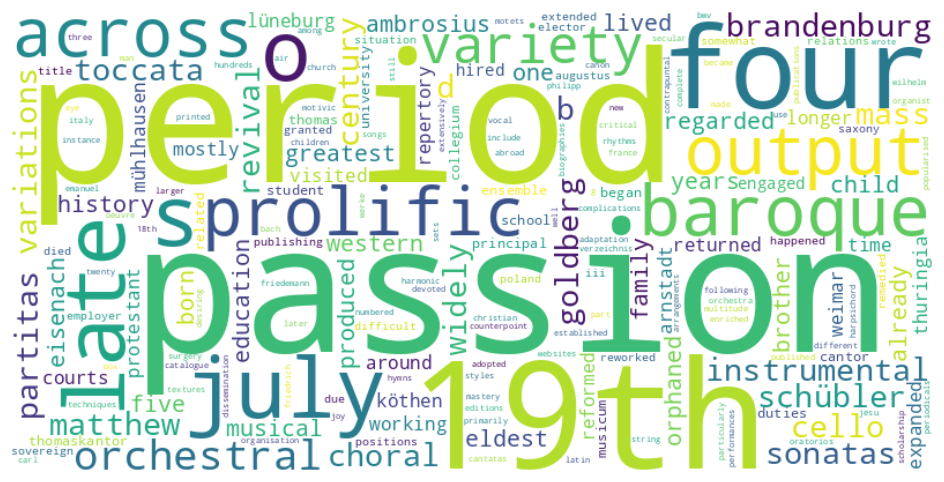

In [ ]:
from collections import Counter

text = text.replace("\ufeff", "")

words = [w.lower().strip(".,;:!?()[]\"'") for w in text.split()]
counts = Counter(words)

filtered_words = [w for w in words if counts[w] <= 1]

filtered_text = " ".join(filtered_words)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(filtered_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


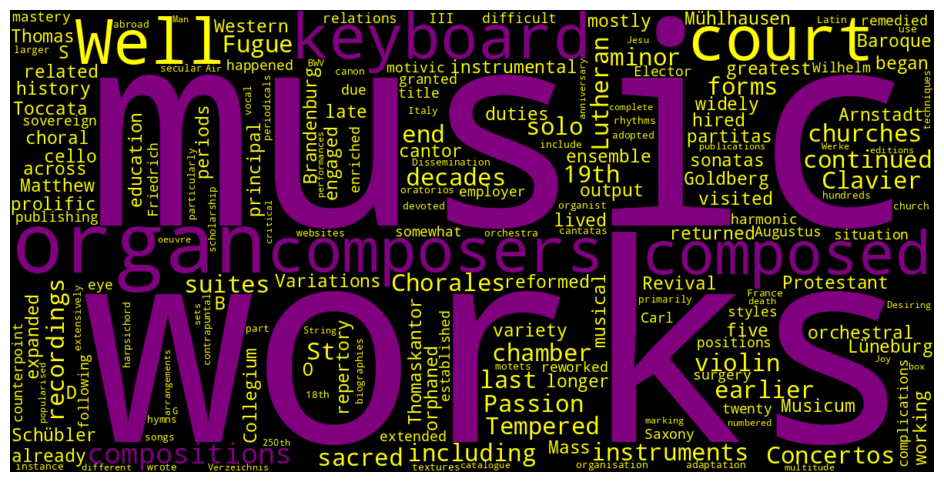

In [ ]:

stops_url = "https://drive.google.com/uc?export=download&id=1UcItx7pOdDiNE1Quj1Y8tzk1XKZML5sB"
response = requests.get(stops_url)
file_words = [w.strip().lstrip("\ufeff") for w in response.text.splitlines()]

stops = set(STOPWORDS)
stops.update(file_words)

words = [w.lower().strip(".,;:!?()[]\"'") for w in text.split()]
counts = Counter(words)

def color_func(word, font_size, position, orientation, font_path, random_state):
    if counts[word] > 2:
        return "purple"
    else:
        return "yellow"

wc = WordCloud(
    stopwords=stops,
    background_color="black",
    color_func=color_func,
    width=1200,
    height=600
).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

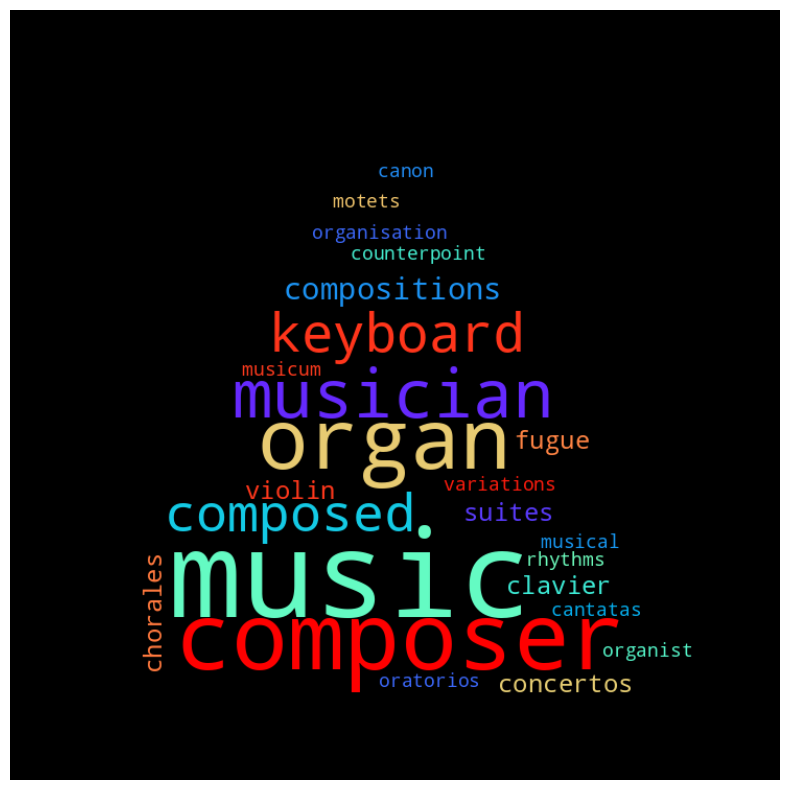

In [ ]:
music_roots = {
    "music", "musician", "fugue", "canon",
    "chorale", "cantata", "suite", "concerto",
    "variation", "clavier", "keyboard", "violin",
    "organ", "motet", "oratorio",
    "counterpoint", "harmony", "rhythm",
    "composition", "compose"
}

words = text.lower().split()

cleaned = [w.strip(".,;:!?()[]\"'") for w in words]

filtered_text = " ".join(
    w for w in cleaned
    if any(w.startswith(root) for root in music_roots)
)

wc = WordCloud(
    mask=mask,
    background_color="black",
    colormap="rainbow"
).generate(filtered_text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


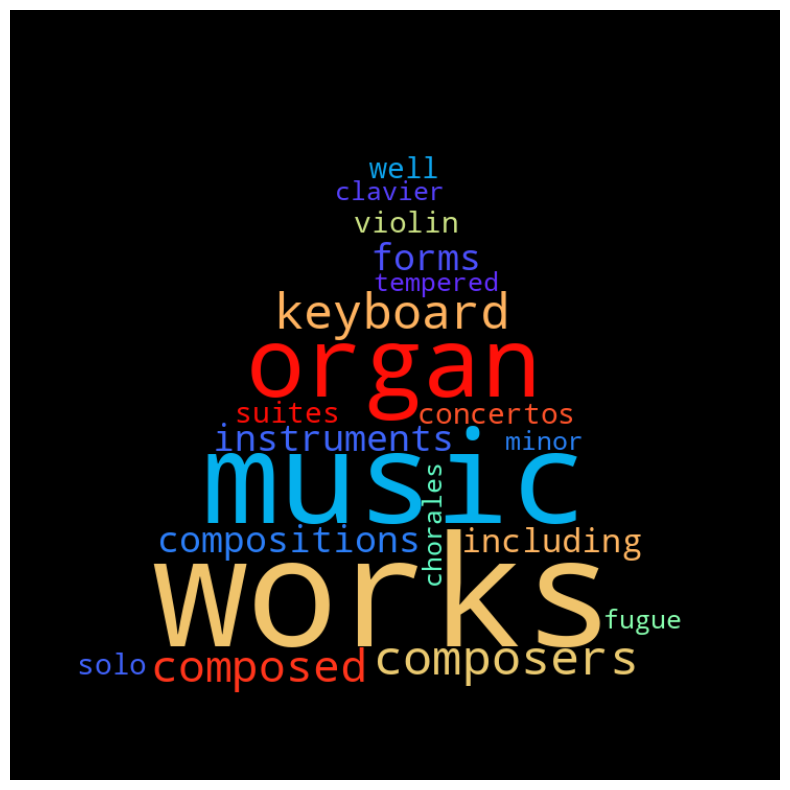

In [ ]:

stops_url = "https://drive.google.com/uc?export=download&id=1UcItx7pOdDiNE1Quj1Y8tzk1XKZML5sB"
response = requests.get(stops_url)
file_words = [w.strip().lstrip("\ufeff") for w in response.text.splitlines()]

stops = set(STOPWORDS)
stops.update(file_words)

words = [w.lower().strip(".,;:!?()[]\"'") for w in text.split()]
words = [w for w in words if w not in stops]

counts = Counter(words)
top10 = [w for w, c in counts.most_common(20)]

filtered_text = " ".join(top10)

wc = WordCloud(
    mask=mask,
    background_color="black",
    colormap="rainbow",
    width=1000,
    height=1000
).generate(filtered_text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()